<a href="https://colab.research.google.com/github/nikhil-1e9/Stock-Price-Prediction/blob/main/Netflix_stock_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix (NFLX) Stock Price prediction using Facebook Prophet

## Importing all the necessary Libraries

In [1]:
from google.colab import files
upload = files.upload()

Saving NFLX.csv to NFLX.csv


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from prophet import Prophet
import os

In [2]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [3]:
df = pd.read_csv("NFLX.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5320,2023-07-13,447.000000,451.670013,441.179993,450.380005,450.380005,6157500
5321,2023-07-14,452.790009,456.480011,439.700012,441.910004,441.910004,7184900
5322,2023-07-17,445.570007,456.679993,445.109985,450.049988,450.049988,6891700
5323,2023-07-18,451.000000,478.149994,448.779999,474.799988,474.799988,13196900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5325 entries, 0 to 5324
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5325 non-null   object 
 1   Open       5325 non-null   float64
 2   High       5325 non-null   float64
 3   Low        5325 non-null   float64
 4   Close      5325 non-null   float64
 5   Adj Close  5325 non-null   float64
 6   Volume     5325 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 291.3+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5.325000e+03
mean,126.038349,128.021006,123.993754,126.068779,126.068779,1.613431e+07
std,169.984863,172.466138,167.356162,169.962023,169.962023,1.885147e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,4.071429,4.144286,3.972857,4.072857,4.072857,6.079500e+06
50%,31.731428,32.200001,31.081429,31.698570,31.698570,1.026830e+07
75%,208.800003,212.979996,205.589996,209.990005,209.990005,1.910860e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


# Data Visualization using plotly express- Visualizing the historical performance of Netflix

In [11]:
# !pip install -U kaleido

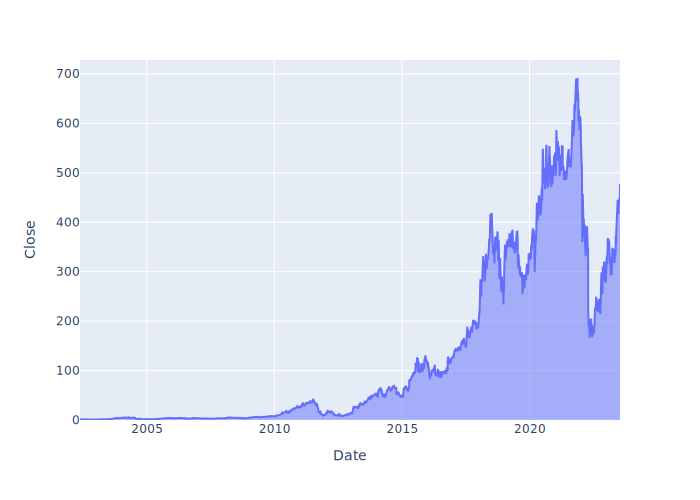

In [12]:
fig = px.area(df, x='Date', y='Close')
fig.show('svg')

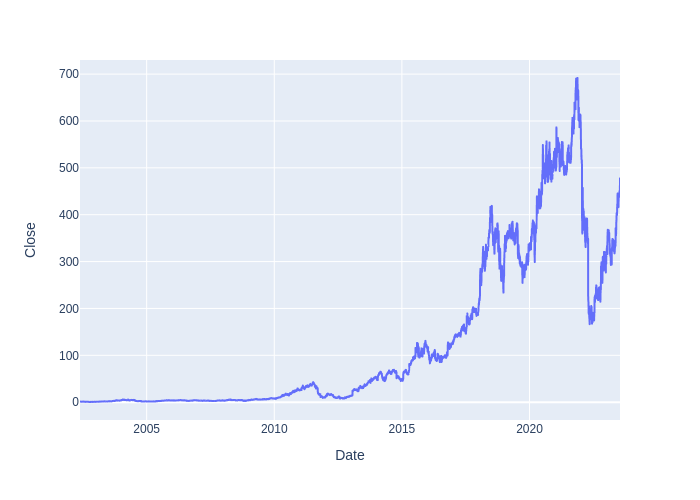

In [24]:
fig = px.line(df, x='Date', y='Close')
fig.show('png')

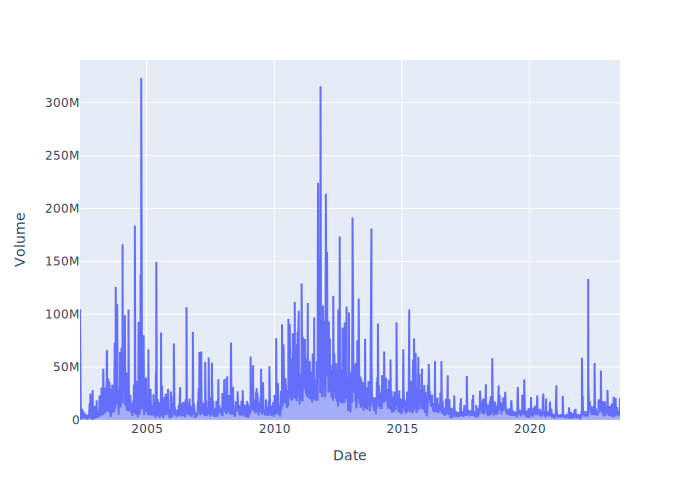

In [14]:
fig = px.area(df, x='Date', y='Volume')
fig.show('svg')

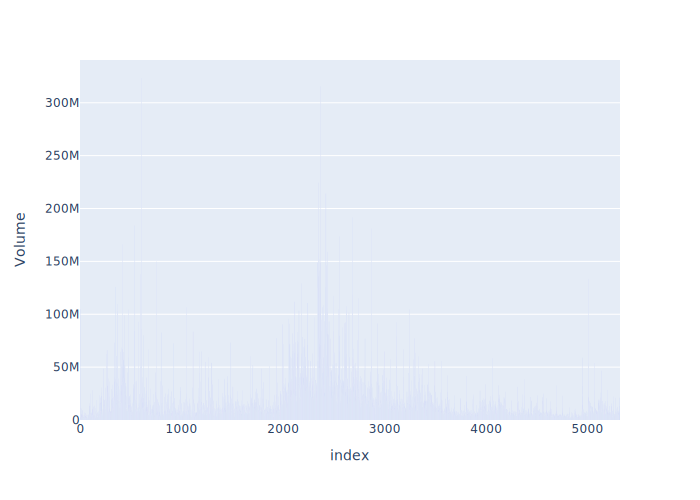

In [15]:
fig = px.bar(df, y='Volume')
fig.show('svg')

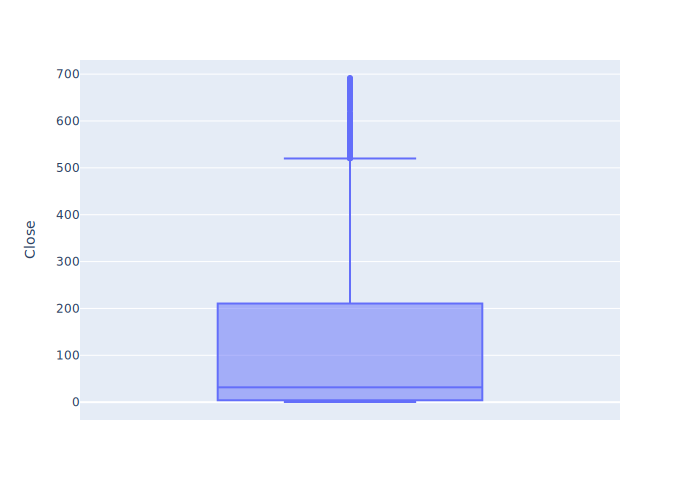

In [16]:
fig = px.box(df, y='Close')
fig.show('svg')

# Understanding Facebook Prophet

- Accurate and Fast: It is accurate and can generate results a lot faster compared to other time series libraries
- Reliable: Extensive documentation available
- Fully automatic: Works with missing data and no need to perform extensive data preprocessing
- Domain Knowledge integration: Forecasting can be made better by adding domain knowledge expertise like holidays and patterns

## Data Preparation

In [17]:
prophet_df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df.head()

,ds,y
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429


## Creating Facebook Prophet Model

In [18]:
model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_48i6gyg/5t_sr145.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_48i6gyg/2hjpeva9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82553', 'data', 'file=/tmp/tmp_48i6gyg/5t_sr145.json', 'init=/tmp/tmp_48i6gyg/2hjpeva9.json', 'output', 'file=/tmp/tmp_48i6gyg/prophet_modellcm7zw8c/prophet_model-20230810200936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:09:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:09:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [19]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-05-23,0.983639,-78.229587,65.595718,0.983639,0.983639,-5.501087,-5.501087,-5.501087,-0.839681,...,0.119485,0.119485,0.119485,-4.780891,-4.780891,-4.780891,0.0,0.0,0.0,-4.517449
1,2002-05-24,0.986094,-83.026186,68.525934,0.986094,0.986094,-6.113442,-6.113442,-6.113442,-0.839681,...,-0.804254,-0.804254,-0.804254,-4.469507,-4.469507,-4.469507,0.0,0.0,0.0,-5.127348
2,2002-05-28,0.995916,-73.047634,68.685894,0.995916,0.995916,-4.145154,-4.145154,-4.145154,-0.839681,...,0.126592,0.126592,0.126592,-3.432064,-3.432064,-3.432064,0.0,0.0,0.0,-3.149238
3,2002-05-29,0.998372,-73.325027,75.887849,0.998372,0.998372,-3.980454,-3.980454,-3.980454,-0.839681,...,0.088511,0.088511,0.088511,-3.229284,-3.229284,-3.229284,0.0,0.0,0.0,-2.982083
4,2002-05-30,1.000827,-78.672353,71.890726,1.000827,1.000827,-3.768703,-3.768703,-3.768703,-0.839681,...,0.119485,0.119485,0.119485,-3.048507,-3.048507,-3.048507,0.0,0.0,0.0,-2.767876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,2024-07-14,386.192233,319.150622,469.993482,377.329892,396.034733,4.781296,4.781296,4.781296,-0.839681,...,0.104960,0.104960,0.104960,5.516017,5.516017,5.516017,0.0,0.0,0.0,390.973528
5686,2024-07-15,386.181442,320.098065,463.035774,377.281121,396.076145,4.688768,4.688768,4.688768,-0.839681,...,0.259746,0.259746,0.259746,5.268703,5.268703,5.268703,0.0,0.0,0.0,390.870210
5687,2024-07-16,386.170652,321.256048,470.709547,377.232349,396.117557,4.271935,4.271935,4.271935,-0.839681,...,0.126592,0.126592,0.126592,4.985024,4.985024,4.985024,0.0,0.0,0.0,390.442586
5688,2024-07-17,386.159861,317.769113,465.064371,377.183577,396.158501,3.916999,3.916999,3.916999,-0.839681,...,0.088511,0.088511,0.088511,4.668169,4.668169,4.668169,0.0,0.0,0.0,390.076860


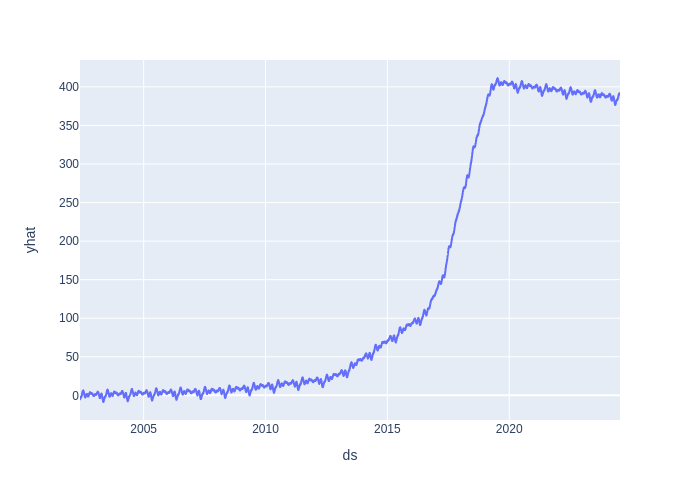

In [25]:
fig = px.line(forecast, x='ds', y='yhat')
fig.show('png')

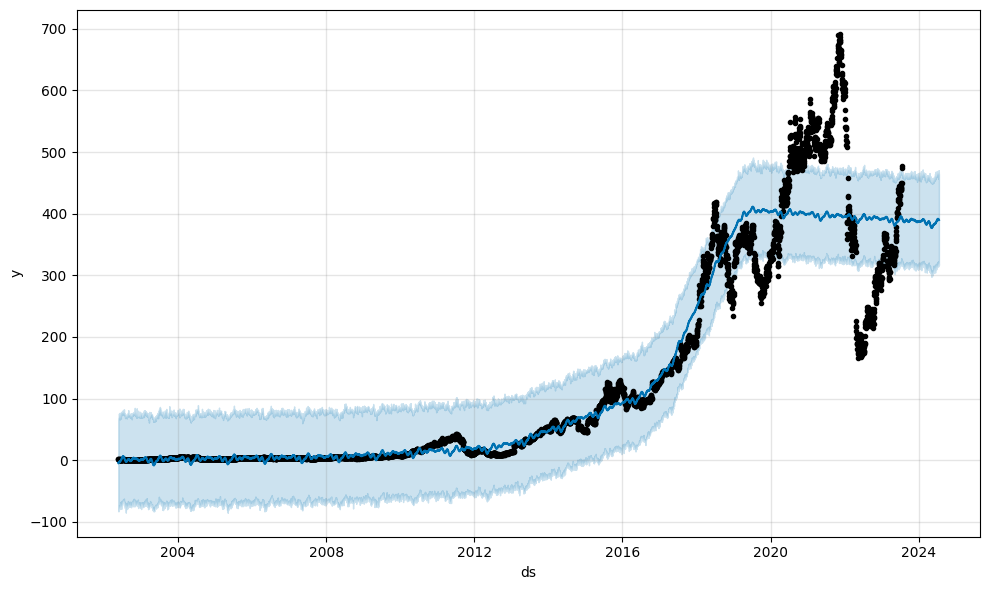

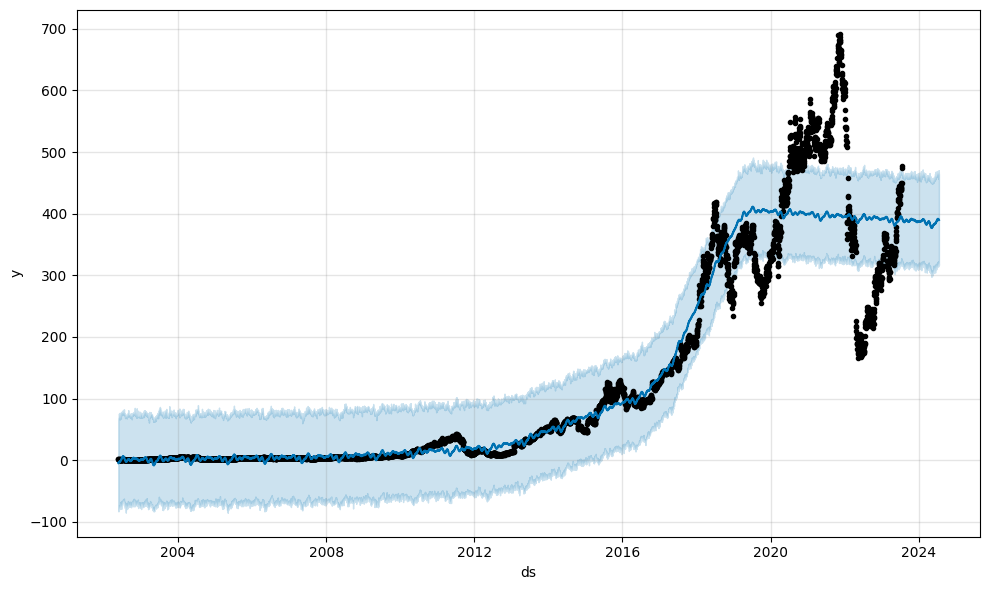

In [22]:
model.plot(forecast, xlabel='ds', ylabel='y')

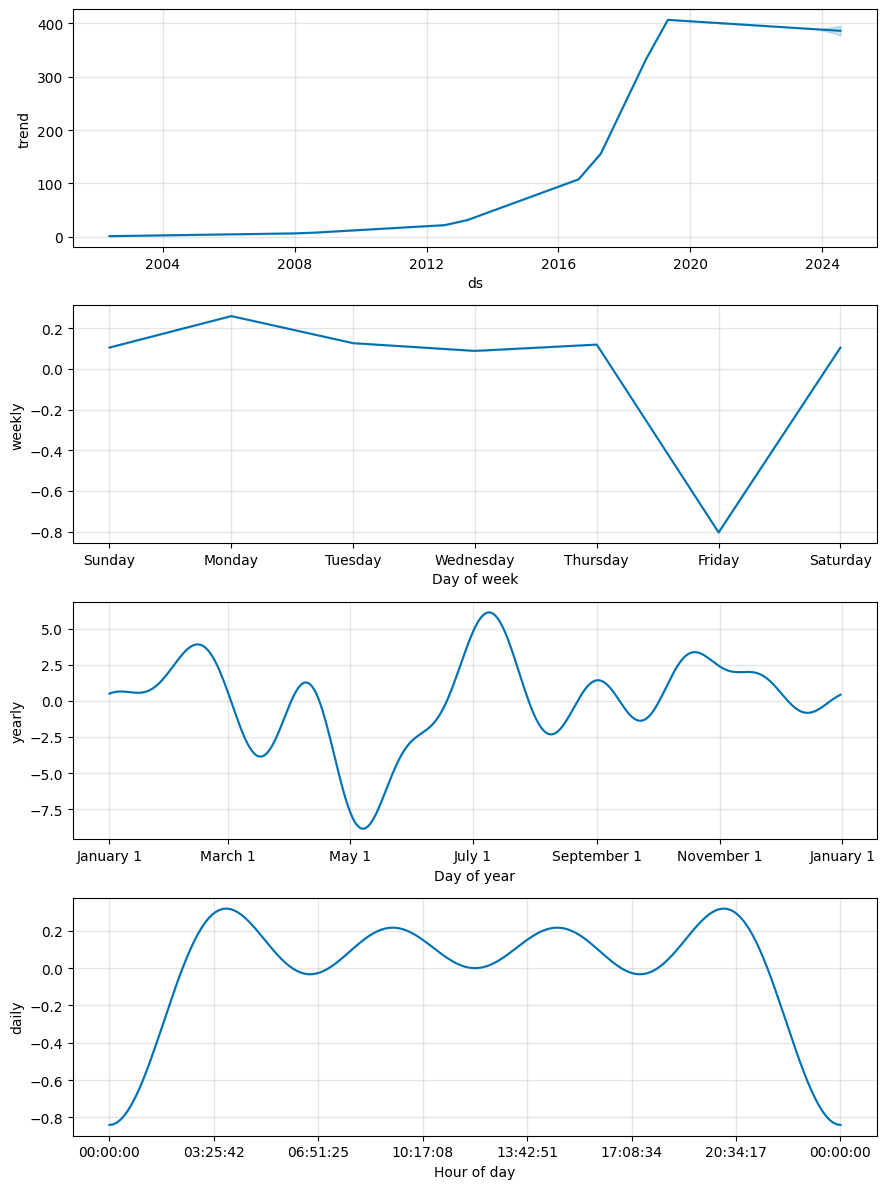

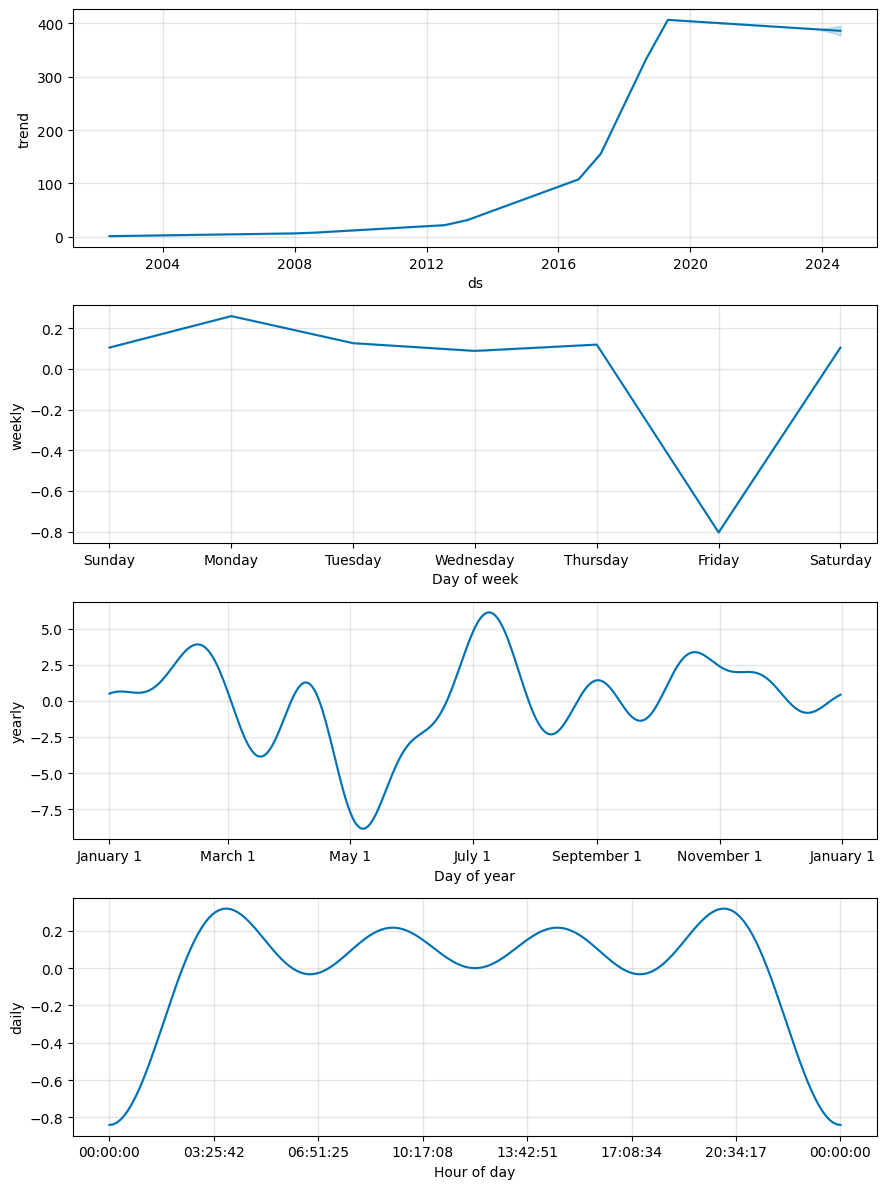

In [23]:
model.plot_components(forecast)

##Downloading the Forecast data

In [21]:
forecast.to_csv('nflx_forecast.csv')
files.download('nflx_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>